## Organisation :
Dans ce second notebook, on souhaite comprendre et interpréter les données des études cliniques extraites dans le notebook précédent, notamment en générant des visualisations.

- On importe les données extraites dans le notebook précédent
- On vérifie la cohérence des données
- Génération des visualisations et repérage des données problématiques:
   
    + Champ 'HasResults'
    + Publications par type et par année
    + Délai entre la publication et la fin de l'étude
    + Délai entre la publication et le début de l'étude
    + Passages des données problématiques en type 'SUSPICIOUS'
    + Durée des études cliniques

- Statistiques
- Export pour un traitement manuel

Installer `Seaborn`, si il n'est pas déjà présent:

`python -m pip install seaborn`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Import de la DataFrame :

In [2]:
df_extract = pd.read_csv(
    'Data/outputs/df_extract.csv', sep=';', encoding='utf-8-sig'
)
# df_extract.info()

In [3]:
df_extract = df_extract.astype(
    {
        'OverallStatus': 'category',
        'StudyType': 'category', 
        'type': 'category',

        'StudyFirstPostDate': 'datetime64[ns]',
        'StartDate': 'datetime64[ns]',
        'CompletionDate': 'datetime64[ns]',
        'published_date': 'datetime64[ns]',
    }
)
df_extract = df_extract.convert_dtypes()
df_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   NCTId               498 non-null    string        
 1   BriefTitle          498 non-null    string        
 2   LeadSponsorName     498 non-null    string        
 3   CollaboratorName    224 non-null    string        
 4   OverallStatus       498 non-null    category      
 5   StudyType           498 non-null    category      
 6   HasResults          498 non-null    boolean       
 7   StudyFirstPostDate  498 non-null    datetime64[ns]
 8   StartDate           498 non-null    datetime64[ns]
 9   CompletionDate      498 non-null    datetime64[ns]
 10  pmid                393 non-null    Int64         
 11  type                393 non-null    category      
 12  title               393 non-null    string        
 13  authors             393 non-null    string        

In [4]:
df_extract

,NCTId,BriefTitle,LeadSponsorName,CollaboratorName,OverallStatus,StudyType,HasResults,StudyFirstPostDate,StartDate,CompletionDate,pmid,type,title,authors,doi,publication_types,is_oa,published_date
0,NCT02777229,Efficacy and Safety of a Dolutegravir-based Re...,"ANRS, Emerging Infectious Diseases",Institut de Recherche pour le Developpement | ...,COMPLETED,INTERVENTIONAL,False,2016-05-19,2016-07-01,2021-07-01,37851566,PUBMED,Improvements in Patient-Reported Outcomes Foll...,Bousmah MA; Protopopescu C; Mpoudi-Etame M; Om...,10.1097/QAI.0000000000003273,"['Randomized Controlled Trial', 'Journal Artic...",False,2023-11-01
1,NCT02777229,Efficacy and Safety of a Dolutegravir-based Re...,"ANRS, Emerging Infectious Diseases",Institut de Recherche pour le Developpement | ...,COMPLETED,INTERVENTIONAL,False,2016-05-19,2016-07-01,2021-07-01,33355914,DERIVED,Cost-Utility Analysis of a Dolutegravir-Based ...,Bousmah MA; Nishimwe ML; Tovar-Sanchez T; Lant...,10.1007/s40273-020-00987-3,['Journal Article'],True,2020-12-23
2,NCT02777229,Efficacy and Safety of a Dolutegravir-based Re...,"ANRS, Emerging Infectious Diseases",Institut de Recherche pour le Developpement | ...,COMPLETED,INTERVENTIONAL,False,2016-05-19,2016-07-01,2021-07-01,33010241,DERIVED,Dolutegravir-based and low-dose efavirenz-base...,Calmy A; Tovar Sanchez T; Kouanfack C; Mpoudi-...,10.1016/S2352-3018(20)30238-1,"['Journal Article', 'Multicenter Study', 'Rand...",False,2020-10-01
3,NCT02777229,Efficacy and Safety of a Dolutegravir-based Re...,"ANRS, Emerging Infectious Diseases",Institut de Recherche pour le Developpement | ...,COMPLETED,INTERVENTIONAL,False,2016-05-19,2016-07-01,2021-07-01,38156046,PUBMED,Durability of the Efficacy and Safety of Dolut...,Mpoudi-Etame M; Tovar Sanchez T; Bousmah MA; O...,10.1093/ofid/ofad582,['Journal Article'],True,2023-11-20
4,NCT02777229,Efficacy and Safety of a Dolutegravir-based Re...,"ANRS, Emerging Infectious Diseases",Institut de Recherche pour le Developpement | ...,COMPLETED,INTERVENTIONAL,False,2016-05-19,2016-07-01,2021-07-01,31339676,DERIVED,Dolutegravir-Based or Low-Dose Efavirenz-Based...,NAMSAL ANRS 12313 Study Group; Kouanfack C; Mp...,10.1056/NEJMoa1904340,"['Journal Article', 'Multicenter Study', 'Rand...",True,2019-08-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,NCT02172677,The Influence of Collective Schemas on Individ...,Institut National de la Santé Et de la Recherc...,La Région Basse-Normandie | Université de Caen...,COMPLETED,INTERVENTIONAL,False,2014-06-24,2014-10-01,2016-10-14,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaT
494,NCT01037777,RISCA : Prospective Study of Individuals at Ri...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,OBSERVATIONAL,False,2009-12-23,2009-05-07,2017-12-14,24780882,DERIVED,Prediction of the age at onset in spinocerebel...,Tezenas du Montcel S; Durr A; Rakowicz M; Nane...,10.1136/jmedgenet-2013-102200,['Journal Article'],True,2014-04-29
495,NCT01037777,RISCA : Prospective Study of Individuals at Ri...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,OBSERVATIONAL,False,2009-12-23,2009-05-07,2017-12-14,23707147,DERIVED,Biological and clinical characteristics of ind...,Jacobi H; Reetz K; du Montcel ST; Bauer P; Mar...,10.1016/S1474-4422(13)70104-2,['Journal Article'],False,2013-07-01
496,NCT01037777,RISCA : Prospective Study of Individuals at Ri...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,OBSERVATIONAL,False,2009-12-23,2009-05-07,2017-12-14,35264424,DERIVED,Levels of Neurofilament Light at the Preataxic...,Wilke C; Mengel D; Schöls L; Hengel H; Rakowic...,10.1212/WNL.0000000000200257,['Journal Article'],True,2022-05-17


## Vérification des données

### Nombre d'études :

In [5]:
df_extract.loc[:, 'NCTId'].nunique()

200

### Nombre de publications :

#### PMIDs :

Nombre de pmids total:

In [6]:
df_extract.loc[:, 'pmid'].count()

393

Nombre de pmids uniques:

In [7]:
df_extract.loc[:, 'pmid'].nunique()

387

Etudes qui partagent une publication :

In [8]:
df_extract.loc[
    df_extract['pmid'].notna() & df_extract['pmid'].duplicated(keep=False),
    ['NCTId', 'BriefTitle', 'pmid', 'type', 'title', 'doi'],
].sort_values(by='pmid')

,NCTId,BriefTitle,pmid,type,title,doi
317,NCT00136630,"Natural History, Genetic Bases and Phenotype-g...",24780882,DERIVED,Prediction of the age at onset in spinocerebel...,10.1136/jmedgenet-2013-102200
494,NCT01037777,RISCA : Prospective Study of Individuals at Ri...,24780882,DERIVED,Prediction of the age at onset in spinocerebel...,10.1136/jmedgenet-2013-102200
5,NCT01882062,Proof of Concept of an Anaplerotic Study Using...,25568297,RESULT,Triheptanoin improves brain energy metabolism ...,10.1212/WNL.0000000000001214
103,NCT01696708,Utilization of 31P-Nuclear Magnetic Resonance ...,25568297,DERIVED,Triheptanoin improves brain energy metabolism ...,10.1212/WNL.0000000000001214
96,NCT03519503,Infant Peri-Exposure Prophylaxis to Prevent HI...,26603917,BACKGROUND,Extended pre-exposure prophylaxis with lopinav...,10.1016/S0140-6736(15)00984-8
144,NCT03870438,Prevention of Mother-to-child Transmission of ...,26603917,BACKGROUND,Extended pre-exposure prophylaxis with lopinav...,10.1016/S0140-6736(15)00984-8
173,NCT00640263,Comparison of Efficacy and Safety of Infant Pe...,26603917,DERIVED,Extended pre-exposure prophylaxis with lopinav...,10.1016/S0140-6736(15)00984-8
192,NCT02573948,Feasibility of Interventions on People Who Inj...,27178119,RESULT,Integrated respondent-driven sampling and peer...,10.1080/09540121.2016.1178698
201,NCT04008927,A Community-based Intervention Among Active Dr...,27178119,BACKGROUND,Integrated respondent-driven sampling and peer...,10.1080/09540121.2016.1178698
365,NCT03537196,DRug Use & Infections in ViEtnam - Hepatitis C...,27178119,BACKGROUND,Integrated respondent-driven sampling and peer...,10.1080/09540121.2016.1178698


In [9]:
num_duplicate_pmid = len(
    df_extract.loc[
        df_extract['pmid'].notna() & df_extract['pmid'].duplicated(),
        'pmid',
    ]
)

assert (
    df_extract.loc[:, 'pmid'].count()
    == df_extract.loc[:, 'pmid'].nunique() + num_duplicate_pmid
)

#### DOIs :

Nombre de DOI total:

In [10]:
df_extract.loc[:, 'doi'].count()

392

Nombre de DOI uniques:

In [11]:
df_extract.loc[:, 'doi'].nunique()

386

Etude avec un PMID mais sans DOI :

In [12]:
df_extract.loc[
    df_extract.loc[:, 'pmid'].notna() & df_extract.loc[:, 'doi'].isna(),
    ['NCTId', 'BriefTitle', 'pmid', 'type', 'title', 'doi', 'published_date'],
]

,NCTId,BriefTitle,pmid,type,title,doi,published_date
369,NCT03537196,DRug Use & Infections in ViEtnam - Hepatitis C...,19839502,BACKGROUND,High prevalence of Hepatitis C virus genotype ...,<NA>,NaT


In [13]:
num_duplicate_doi = len(
    df_extract.loc[
        df_extract['doi'].notna() & df_extract['doi'].duplicated(),
        ['doi'],
    ]
)

assert (
    df_extract.loc[:, 'doi'].count()
    == df_extract.loc[:, 'doi'].nunique() + num_duplicate_doi
)

### Vérification des sponsors:

In [14]:
df_extract.drop_duplicates(subset='NCTId').loc[:, 'LeadSponsorName'].value_counts()

LeadSponsorName
Institut National de la Santé Et de la Recherche Médicale, France    112
ANRS, Emerging Infectious Diseases                                    77
French National Agency for Research on AIDS and Viral Hepatitis        8
Paris Cardiovascular Research Center (Inserm U970)                     2
Programme PAC-CI, Site ANRS-MIE de Côte d'Ivoire                       1
Name: count, dtype: Int64

### Vérification des dates :

#### StudyFirstPostDate :

In [15]:
df_extract.drop_duplicates(subset='NCTId').loc[:, 'StudyFirstPostDate'].notna().value_counts()

StudyFirstPostDate
True    200
Name: count, dtype: int64

#### StartDate :

In [16]:
df_extract.drop_duplicates(subset='NCTId').loc[:, 'StartDate'].notna().value_counts()

StartDate
True    200
Name: count, dtype: int64

#### CompletionDate :

In [17]:
df_extract.drop_duplicates(subset='NCTId').loc[:, 'CompletionDate'].notna().value_counts()

CompletionDate
True    200
Name: count, dtype: int64

#### Nombre d'études dont la date de fin est après 2013 :

In [18]:
(df_extract.drop_duplicates(subset='NCTId').loc[:, 'CompletionDate'].dt.year >= 2013).value_counts()

CompletionDate
True    200
Name: count, dtype: int64

#### published_date :

Si le DOI est \<NA>, alors 'published_date' est \<NA> car on interroge Unpaywall via le DOI :

In [19]:
df_extract.loc[:, 'published_date'].notna().value_counts()

published_date
True     392
False    106
Name: count, dtype: int64

## Champ 'HasResults':

Etudes dont le champ 'HasResults' est True:

In [20]:
df_extract.loc[df_extract.loc[:, 'HasResults'], 'NCTId'].unique()

<StringArray>
['NCT01882062', 'NCT01605890', 'NCT02212379', 'NCT02453048', 'NCT02573948',
 'NCT00928187']
Length: 6, dtype: string

In [21]:
df_extract.loc[df_extract.loc[:, 'HasResults'], ['NCTId', 'HasResults', 'type']]

,NCTId,HasResults,type
5,NCT01882062,True,RESULT
73,NCT01605890,True,DERIVED
91,NCT02212379,True,PUBMED
157,NCT02453048,True,DERIVED
158,NCT02453048,True,BACKGROUND
159,NCT02453048,True,BACKGROUND
160,NCT02453048,True,BACKGROUND
161,NCT02453048,True,BACKGROUND
162,NCT02453048,True,BACKGROUND
163,NCT02453048,True,BACKGROUND


In [22]:
nb_studies = len(df_extract.loc[:, 'NCTId'].unique())
nb_studies_has_result = len(
    df_extract.loc[df_extract.loc[:, 'HasResults'], 'NCTId'].unique()
)
print("Nombre d'etudes dont le champ 'HasResults' est True:")
print(f'{nb_studies_has_result}/{nb_studies}')

Nombre d'etudes dont le champ 'HasResults' est True:
6/200


**Le nombre très faible d'études qui renseignent le champ 'HasResults', fait que l'on peut difficilement exploiter cette donnée**.

Mais quand le champs est renseigné, on a affaire à des études de qualité, où l'on peut généralement se fier aux types de publication indiqué.

## Publications par type et par année:

Nombre de publications par année:

In [23]:
df_year_type = df_extract.loc[:, ['published_date', 'type']].dropna()
df_year_type['year'] = df_year_type['published_date'].dt.year.astype(int)
df_year_type = df_year_type.drop(columns='published_date')
df_year_type

,type,year
0,PUBMED,2023
1,DERIVED,2020
2,DERIVED,2020
3,PUBMED,2023
4,DERIVED,2019
...,...,...
491,DERIVED,2021
494,DERIVED,2014
495,DERIVED,2013
496,DERIVED,2022


In [24]:
publications_per_year_pivot_table = pd.pivot_table(
    df_year_type,
    index='year',
    columns='type',
    aggfunc='size',
    fill_value=0,
    observed=False,
)
publications_per_year_pivot_table

type,BACKGROUND,DERIVED,PUBMED,RESULT
year,,,,
1980,0,0,0,1
1990,0,0,0,1
1991,1,0,0,0
1994,1,0,0,0
1999,1,0,0,0
2000,1,0,0,0
2002,1,0,0,0
2003,0,0,0,1
2004,0,0,0,4


In [25]:
min_year = df_year_type.loc[:, 'year'].min()
max_year = df_year_type.loc[:, 'year'].max()
print(f'{min_year=}, {max_year=}')

min_year=1980, max_year=2024


In [26]:
palette = {'BACKGROUND': 'C0', 'DERIVED': 'C1', 'PUBMED': 'C3', 'RESULT': 'C2'}

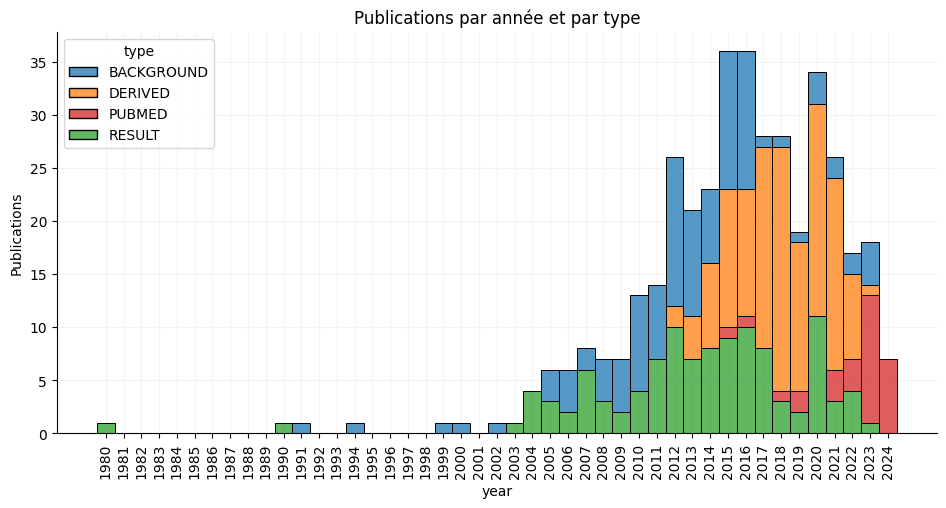

In [27]:
g = sns.histplot(
    data=df_year_type,
    x='year',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# x axis ticks
g.set_xticks(range(min_year, max_year + 1))
g.tick_params(axis='x', labelrotation=90)

# Grid
g.grid(color='0.95')
g.set_axisbelow(True)

# Figure size
plt.tight_layout()
g.figure.set_figwidth(10)
g.figure.set_figheight(5)

# Title
g.set(title='Publications par année et par type', ylabel='Publications')

# Remove spines
sns.despine()

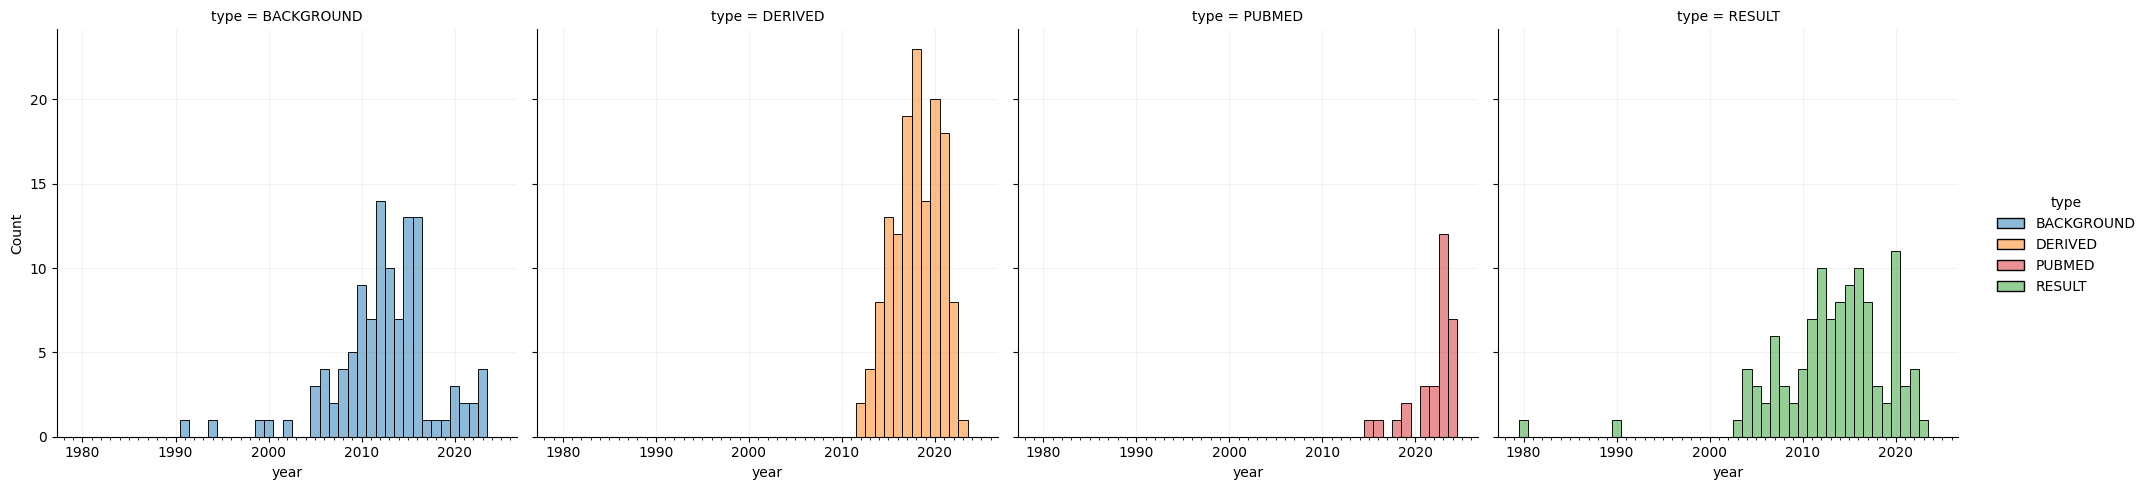

In [28]:
from matplotlib.ticker import AutoMinorLocator

g = sns.displot(
    data=df_year_type,
    x='year',
    hue='type',
    kind='hist',
    col='type',
    discrete=True,
    palette=palette,
)

for ax in g.axes[0]:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

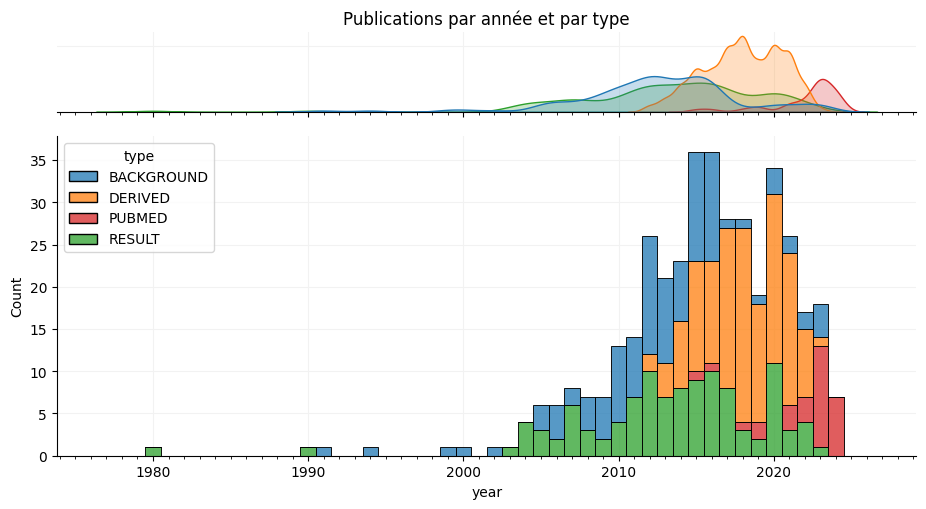

In [29]:
fig, axes = plt.subplots(2, 1, sharex=True, height_ratios=[1, 4])

sns.kdeplot(
    ax=axes[0],
    data=df_year_type,
    x='year',
    hue='type',
    fill=True,
    bw_adjust=0.5,
    legend=False,
    palette=palette,
)
sns.histplot(
    data=df_year_type,
    x='year',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# Figure size
fig.tight_layout()
fig.figure.set_figwidth(10)
fig.figure.set_figheight(5)

for ax in axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
axes[0].set(title='Publications par année et par type', ylabel='')

# Remove spines
sns.despine()
sns.despine(ax=axes[0], left=True)
axes[0].set(yticklabels=[])  # remove the tick labels
axes[0].tick_params(left=False)  # remove the ticks

### Interprétation :

On remarque deux valeurs extrêmes qui sont classées comme **'RESULT'** :

In [30]:
mask = df_extract.loc[:, 'published_date'].dt.year <= 1990
columns_to_display = [
    'NCTId',
    'BriefTitle',
    'CompletionDate',
    'pmid',
    'type',
    'title',
    'doi',
    'published_date',
]

df_extract.loc[mask, columns_to_display]

,NCTId,BriefTitle,CompletionDate,pmid,type,title,doi,published_date
77,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,2271377,RESULT,Apomorphine-induced blinking and yawning in he...,10.1111/j.1365-2125.1990.tb03848.x,1990-11-01
119,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,2018-01-19,6774653,RESULT,Visual-motor function of the primate superior ...,10.1146/annurev.ne.03.030180.001201,1980-03-01


Pour chacune de ces études, toutes leurs publications sont classées comme **'RESULT'**:

In [31]:
nctids = df_extract.loc[mask, 'NCTId']

In [32]:
mask_0 = (df_extract.loc[:, 'NCTId'] == nctids.iloc[0])

df_extract.loc[mask_0, columns_to_display]

,NCTId,BriefTitle,CompletionDate,pmid,type,title,doi,published_date
74,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,15037514,RESULT,Effect of acute and chronic lamotrigine on bas...,10.1038/sj.bjp.0705737,2004-05-01
75,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,15249613,RESULT,PET evidence for a role of the basal ganglia i...,10.1212/01.wnl.0000132840.40838.13,2004-07-13
76,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,15777732,RESULT,"Lamotrigine, carbamazepine and phenytoin diffe...",10.1016/j.eplepsyres.2005.02.002,2005-02-01
77,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,2271377,RESULT,Apomorphine-induced blinking and yawning in he...,10.1111/j.1365-2125.1990.tb03848.x,1990-11-01
78,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,12914551,RESULT,Pharmacokinetic-pharmacodynamic study of apomo...,10.1046/j.1472-8206.2003.00152.x,2003-07-07


In [33]:
mask_1 = (df_extract.loc[:, 'NCTId'] == nctids.iloc[1])

df_extract.loc[mask_1, columns_to_display]

,NCTId,BriefTitle,CompletionDate,pmid,type,title,doi,published_date
117,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,2018-01-19,23916713,RESULT,Enhanced visual responses in the superior coll...,10.1016/j.neuroscience.2013.07.047,2013-11-01
118,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,2018-01-19,22639796,RESULT,Linking visual response properties in the supe...,10.1111/j.1460-9568.2012.08079.x,2012-05-28
119,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,2018-01-19,6774653,RESULT,Visual-motor function of the primate superior ...,10.1146/annurev.ne.03.030180.001201,1980-03-01


**Certaine etudes cliniques classent toutes les publications associées comme 'RESULT', on ne peut donc pas se fier a cette valeur**

Les etudes dont toutes les publications sont de type 'RESULT' :

In [34]:
nctids = df_extract.loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = df_extract.loc[:, 'NCTId'] == nctid
    if (df_extract.loc[mask, 'type'] == 'RESULT').all():
        res.append(nctid)
print(res)
print(f'{len(res)=}')

['NCT01882062', 'NCT01490489', 'NCT01432821', 'NCT02488395', 'NCT04470648', 'NCT02916732', 'NCT03235258']
len(res)=7


In [35]:
df_extract.loc[df_extract.loc[:, 'NCTId'].isin(res), ['NCTId', 'type']].head(10)

,NCTId,type
5,NCT01882062,RESULT
16,NCT01490489,RESULT
17,NCT01490489,RESULT
18,NCT01490489,RESULT
74,NCT01432821,RESULT
75,NCT01432821,RESULT
76,NCT01432821,RESULT
77,NCT01432821,RESULT
78,NCT01432821,RESULT
117,NCT02488395,RESULT


## Délai entre la publication et la fin de l'étude :

In [36]:
df_completion_date = df_extract.loc[:, ['NCTId', 'type', 'CompletionDate', 'published_date']].dropna()
df_completion_date

,NCTId,type,CompletionDate,published_date
0,NCT02777229,PUBMED,2021-07-01,2023-11-01
1,NCT02777229,DERIVED,2021-07-01,2020-12-23
2,NCT02777229,DERIVED,2021-07-01,2020-10-01
3,NCT02777229,PUBMED,2021-07-01,2023-11-20
4,NCT02777229,DERIVED,2021-07-01,2019-08-29
...,...,...,...,...
491,NCT02658253,DERIVED,2019-02-21,2021-02-25
494,NCT01037777,DERIVED,2017-12-14,2014-04-29
495,NCT01037777,DERIVED,2017-12-14,2013-07-01
496,NCT01037777,DERIVED,2017-12-14,2022-05-17


In [37]:
# Example: If we have 190 days between 'published_date' and 'CompletionDate'
# When we rounds up to years, we obtains 0.52 years, 
# If we use the round() function, we will obtain 1 year, when in fact less than a year passed
# The floor() function seems more appropriate

# Example: If we have -77 days between 'published_date' and 'CompletionDate'
# When we rounds up to years, we obtains -0.21 years,
# If we use the floor() function, we will obtain -1 year, when in fact less than a year passed
# We need to use the fix() function from Numpy

# > Some spreadsheet programs calculate the “floor-towards-zero”, where floor(-2.5) == -2. 
# > NumPy instead uses the definition of floor where floor(-2.5) == -3. The “floor-towards-zero” function is called fix in NumPy.

In [38]:
time_completion_publication = np.fix(
    (
        df_completion_date.loc[:, 'published_date']
        - df_completion_date.loc[:, 'CompletionDate']
    ).apply(lambda x: x.days / 365)
).astype(int)

time_completion_publication = time_completion_publication.rename('TimeCompletionPublication')
time_completion_publication = df_completion_date.join(time_completion_publication)
time_completion_publication

,NCTId,type,CompletionDate,published_date,TimeCompletionPublication
0,NCT02777229,PUBMED,2021-07-01,2023-11-01,2
1,NCT02777229,DERIVED,2021-07-01,2020-12-23,0
2,NCT02777229,DERIVED,2021-07-01,2020-10-01,0
3,NCT02777229,PUBMED,2021-07-01,2023-11-20,2
4,NCT02777229,DERIVED,2021-07-01,2019-08-29,-1
...,...,...,...,...,...
491,NCT02658253,DERIVED,2019-02-21,2021-02-25,2
494,NCT01037777,DERIVED,2017-12-14,2014-04-29,-3
495,NCT01037777,DERIVED,2017-12-14,2013-07-01,-4
496,NCT01037777,DERIVED,2017-12-14,2022-05-17,4


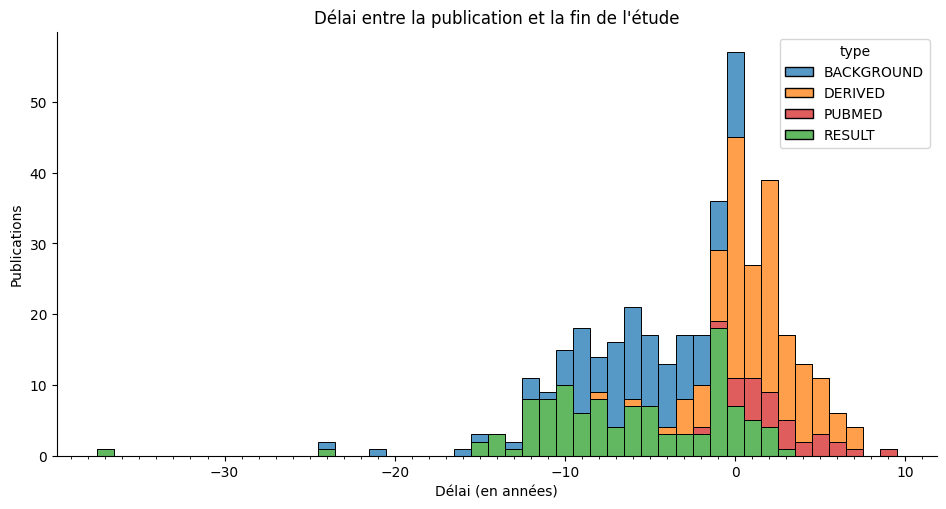

In [39]:
g = sns.histplot(
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    multiple='stack',
    # element="step",
    discrete=True,
    palette=palette,
)

# x axis ticks
g.xaxis.set_minor_locator(AutoMinorLocator(10))

# Figure size
plt.tight_layout()
g.figure.set_figwidth(10)
g.figure.set_figheight(5)

# Title
g.set(
    title="Délai entre la publication et la fin de l'étude",
    xlabel='Délai (en années)',
    ylabel='Publications',
)

# Remove spines
sns.despine()

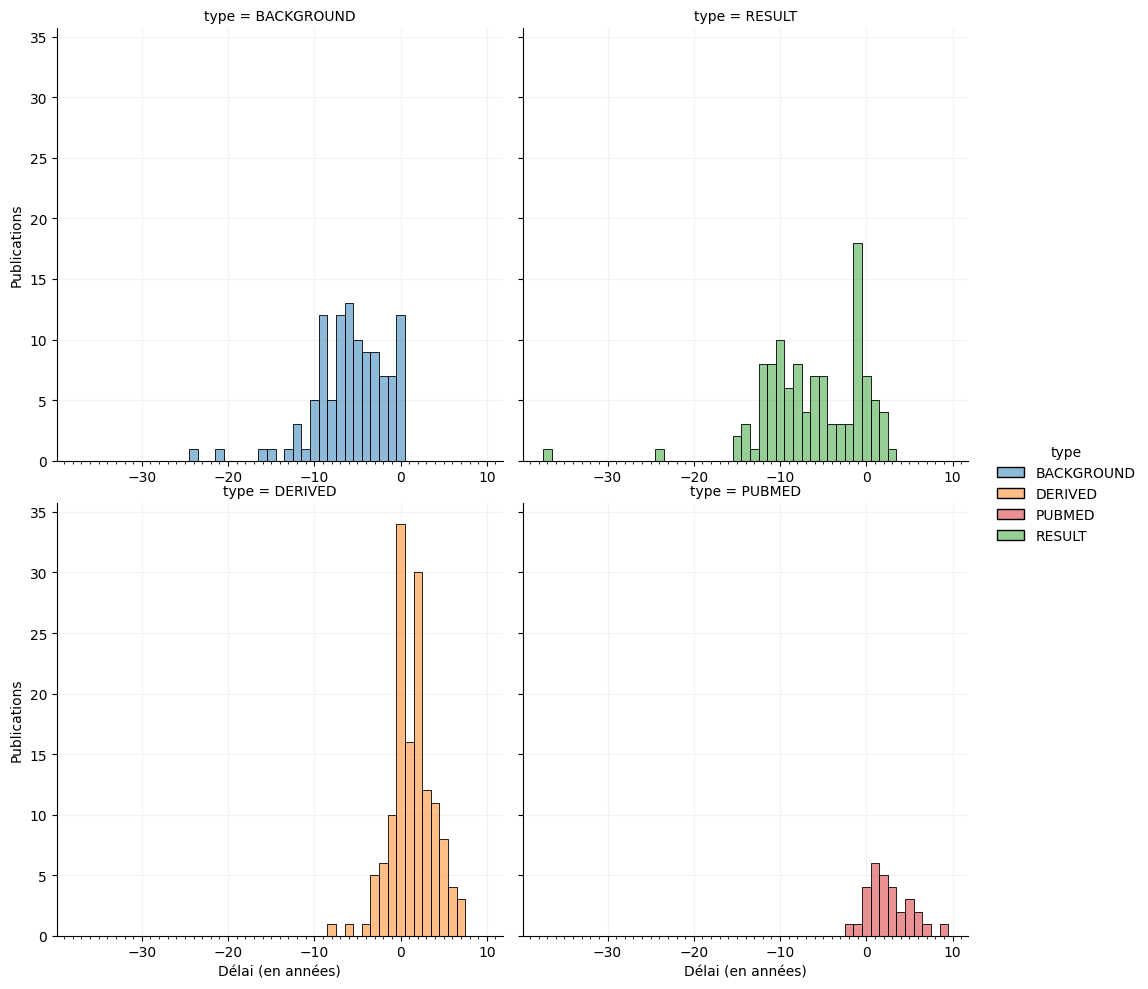

In [40]:
g = sns.displot(
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    col='type',
    col_order=['BACKGROUND', 'RESULT', 'DERIVED', 'PUBMED'],
    col_wrap=2,
    discrete=True,
    kind='hist',
    palette=palette,
)

g.tick_params(labelbottom=True)
g.set_axis_labels('Délai (en années)', 'Publications')

for ax in g.axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

**Problablement des publications de type 'RESULT' parmis les 'DERIVED'**

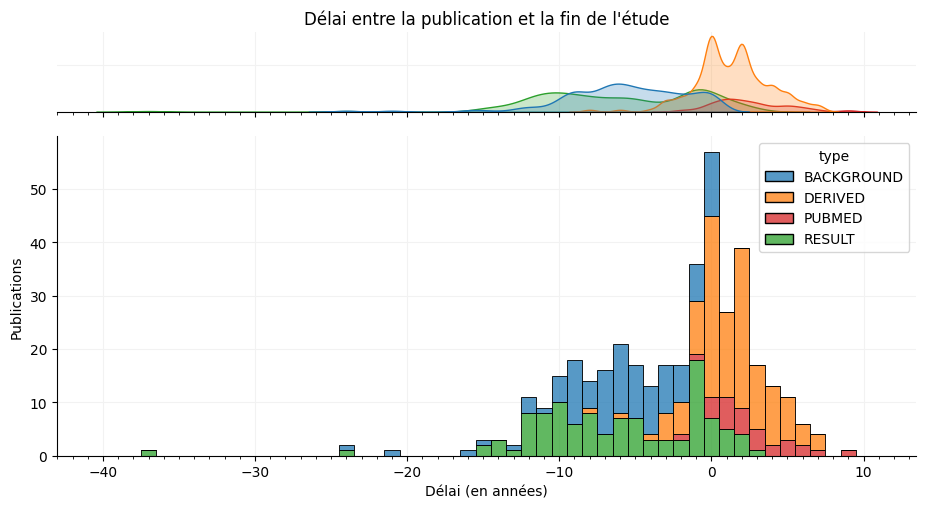

In [41]:
fig, axes = plt.subplots(2, 1, sharex=True, height_ratios=[1, 4])

sns.kdeplot(
    ax=axes[0],
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    fill=True,
    bw_adjust=0.5,
    legend=False,
    palette=palette,
)
sns.histplot(
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# Figure size
fig.tight_layout()
fig.figure.set_figwidth(10)
fig.figure.set_figheight(5)

for ax in axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
axes[0].set(title="Délai entre la publication et la fin de l'étude", ylabel='')
axes[1].set(
    xlabel='Délai (en années)',
    ylabel='Publications',
)

# Remove spines
sns.despine()
sns.despine(ax=axes[0], left=True)
axes[0].set(yticklabels=[])  # remove the tick labels
axes[0].tick_params(left=False)  # remove the ticks

In [42]:
# for type in ['BACKGROUND', 'DERIVED', 'PUBMED', 'RESULT']:
#     mask_type = (time_completion_publication.loc[:, 'type'] == type)
#     df_type = time_completion_publication.loc[mask_type, 'TimeCompletionPublication']
#     df_type = df_type.reindex(time_completion_publication.index)

#     axs = df_type.plot.barh(
#         # x = time_completion_publication.index,
#         y = 'TimeCompletionPublication',
#         figsize = (5, 20),
#         color = palette[type],
#     )

# axs.invert_yaxis()
# axs.yaxis.set_visible(False)
# axs.set_frame_on(False)

# # Title
# axs.set(
#     xlabel='Délai (en années)'
# )

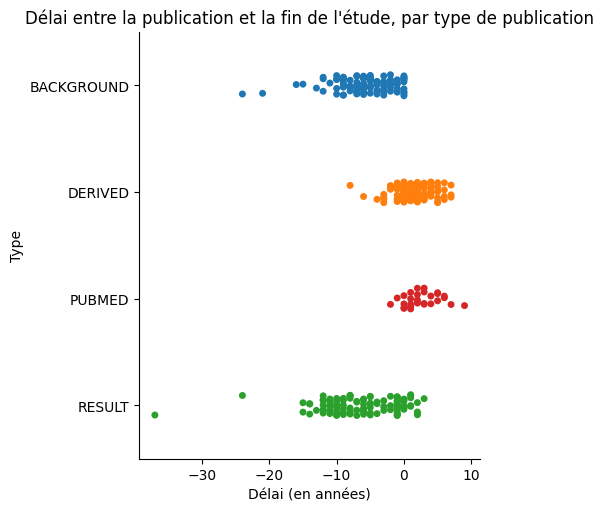

In [43]:
g = sns.catplot(
    data=time_completion_publication.dropna(),
    x='TimeCompletionPublication',
    y='type',
    hue='type',
    jitter=True,
    palette=palette,
)

# Title
g.set(
    title="Délai entre la publication et la fin de l'étude, par type de publication",
    xlabel='Délai (en années)',
    ylabel='Type',
)

## Délai entre la publication et le début de l'étude :

In [44]:
df_start_date = df_extract.loc[:, ['NCTId', 'type', 'StartDate', 'published_date']].dropna()
df_start_date

,NCTId,type,StartDate,published_date
0,NCT02777229,PUBMED,2016-07-01,2023-11-01
1,NCT02777229,DERIVED,2016-07-01,2020-12-23
2,NCT02777229,DERIVED,2016-07-01,2020-10-01
3,NCT02777229,PUBMED,2016-07-01,2023-11-20
4,NCT02777229,DERIVED,2016-07-01,2019-08-29
...,...,...,...,...
491,NCT02658253,DERIVED,2016-01-01,2021-02-25
494,NCT01037777,DERIVED,2009-05-07,2014-04-29
495,NCT01037777,DERIVED,2009-05-07,2013-07-01
496,NCT01037777,DERIVED,2009-05-07,2022-05-17


In [45]:
time_start_publication = np.fix(
    (
        df_start_date.loc[:, 'published_date']
        - df_start_date.loc[:, 'StartDate']
    ).apply(lambda x: x.days / 365)
).astype(int)

time_start_publication = time_start_publication.rename('TimeStartPublication')
time_start_publication = df_start_date.join(time_start_publication)
time_start_publication

,NCTId,type,StartDate,published_date,TimeStartPublication
0,NCT02777229,PUBMED,2016-07-01,2023-11-01,7
1,NCT02777229,DERIVED,2016-07-01,2020-12-23,4
2,NCT02777229,DERIVED,2016-07-01,2020-10-01,4
3,NCT02777229,PUBMED,2016-07-01,2023-11-20,7
4,NCT02777229,DERIVED,2016-07-01,2019-08-29,3
...,...,...,...,...,...
491,NCT02658253,DERIVED,2016-01-01,2021-02-25,5
494,NCT01037777,DERIVED,2009-05-07,2014-04-29,4
495,NCT01037777,DERIVED,2009-05-07,2013-07-01,4
496,NCT01037777,DERIVED,2009-05-07,2022-05-17,13


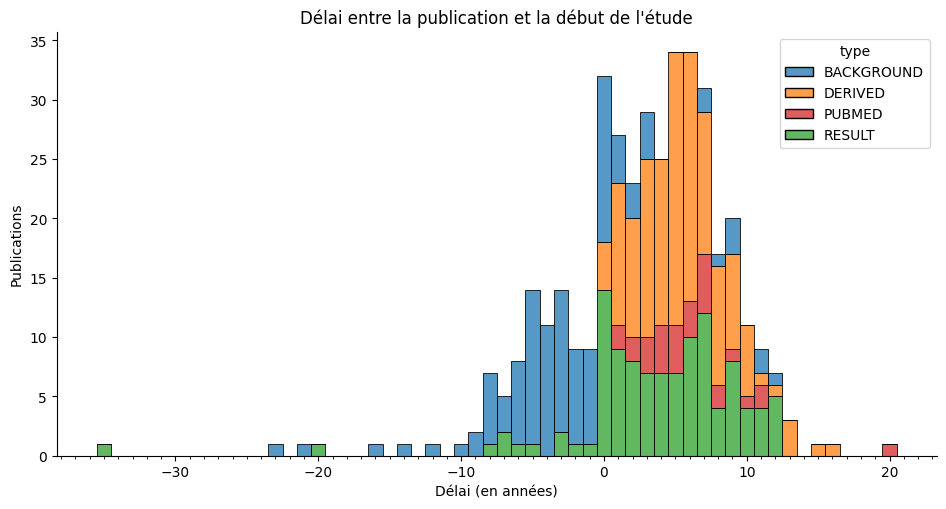

In [46]:
g = sns.histplot(
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    multiple='stack',
    # element="step",
    discrete=True,
    palette=palette,
)

# x axis ticks
g.xaxis.set_minor_locator(AutoMinorLocator(10))

# Figure size
plt.tight_layout()
g.figure.set_figwidth(10)
g.figure.set_figheight(5)

# Title
g.set(
    title="Délai entre la publication et la début de l'étude",
    xlabel='Délai (en années)',
    ylabel='Publications',
)

# Remove spines
sns.despine()

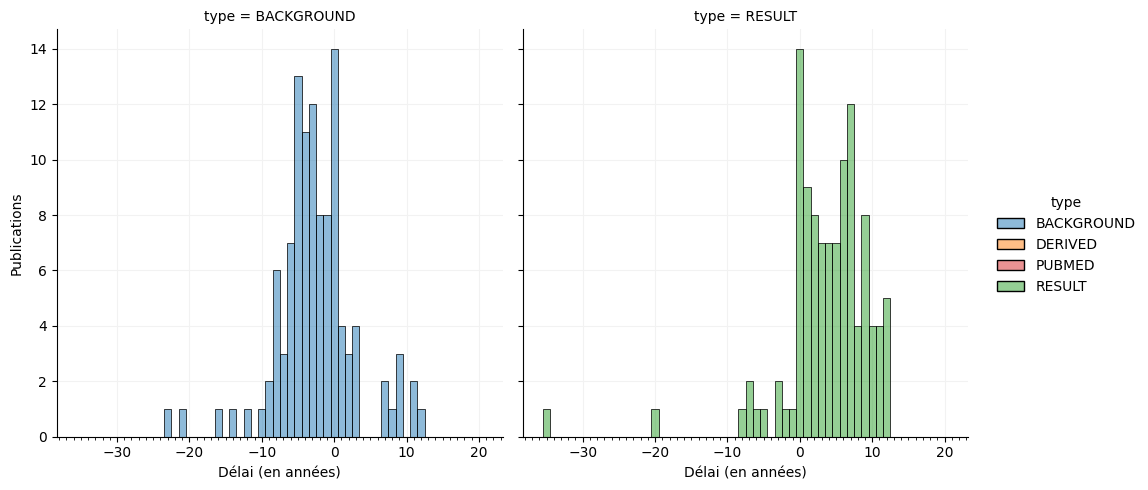

In [47]:
g = sns.displot(
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    col='type',
    col_order=['BACKGROUND', 'RESULT'],
    discrete=True,
    kind='hist',
    palette=palette,
)
# g.set_ylabels('Publications')

# Title
g.set(
    xlabel='Délai (en années)',
    ylabel='Publications',
)

for ax in g.axes[0]:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

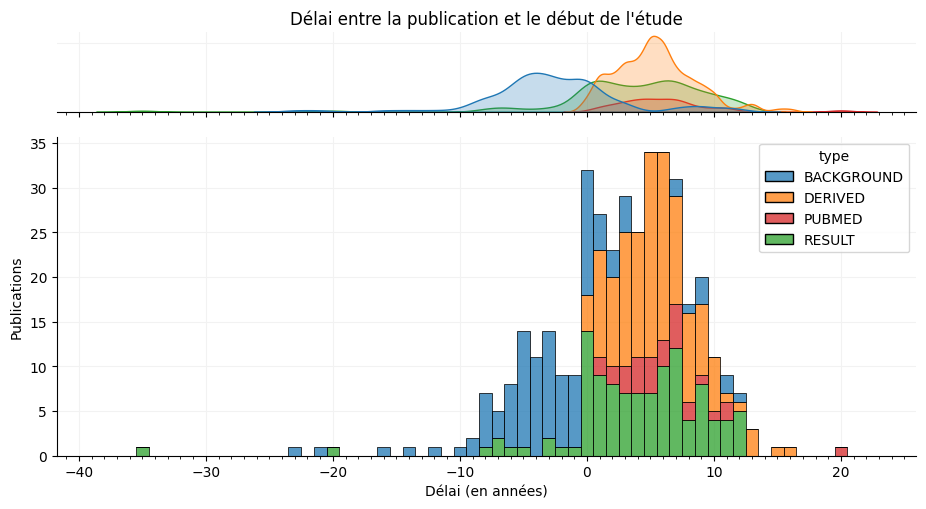

In [48]:
fig, axes = plt.subplots(2, 1, sharex=True, height_ratios=[1, 4])

sns.kdeplot(
    ax=axes[0],
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    fill=True,
    bw_adjust=0.5,
    legend=False,
    palette=palette,
)
sns.histplot(
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# Figure size
fig.tight_layout()
fig.figure.set_figwidth(10)
fig.figure.set_figheight(5)

for ax in axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
axes[0].set(title="Délai entre la publication et le début de l'étude", ylabel='')
axes[1].set(
    xlabel='Délai (en années)',
    ylabel='Publications',
)

# Remove spines
sns.despine()
sns.despine(ax=axes[0], left=True)
axes[0].set(yticklabels=[])  # remove the tick labels
axes[0].tick_params(left=False)  # remove the ticks

### Interprétation :

**Les publications de type 'RESULT' avant la date de début de l'étude sont problématiques -> Les passer en type 'SUSPICIOUS' ?**

**Le cluster de publications de type 'BACKGROUND' 10 ans après le début des études est suspect.**  S'agit-il de 'RESULT' ?

Publications de type 'RESULT' dont la date de publication est antérieur à la date de début de l'essai clinique :

In [49]:
mask_result = df_extract.loc[:, 'type'] == 'RESULT'
mask_time_neg = df_extract.loc[:, 'published_date'] < df_extract.loc[:, 'StartDate']

df_extract.loc[mask_result & mask_time_neg, ['NCTId', 'pmid', 'type', 'StartDate', 'published_date']]

,NCTId,pmid,type,StartDate,published_date
16,NCT01490489,19602057,RESULT,2011-07-11,2008-10-16
17,NCT01490489,16384869,RESULT,2011-07-11,2006-04-01
18,NCT01490489,17531315,RESULT,2011-07-11,2007-10-01
74,NCT01432821,15037514,RESULT,2011-09-01,2004-05-01
75,NCT01432821,15249613,RESULT,2011-09-01,2004-07-13
76,NCT01432821,15777732,RESULT,2011-09-01,2005-02-01
77,NCT01432821,2271377,RESULT,2011-09-01,1990-11-01
78,NCT01432821,12914551,RESULT,2011-09-01,2003-07-07
117,NCT02488395,23916713,RESULT,2015-10-07,2013-11-01
118,NCT02488395,22639796,RESULT,2015-10-07,2012-05-28


On remarque que juste quelques d'études concentrent ces publications problématiques :

In [50]:
nctids = df_extract.loc[mask_result & mask_time_neg].loc[:, 'NCTId'].unique()
nctids

<StringArray>
['NCT01490489', 'NCT01432821', 'NCT02488395', 'NCT04470648', 'NCT00136630']
Length: 5, dtype: string

Ces etudes cliniques semblent classer toutes leurs publications comme 'RESULT' :

In [51]:
df_extract.loc[df_extract.loc[:, 'NCTId'].isin(nctids), ['NCTId', 'type']]

,NCTId,type
16,NCT01490489,RESULT
17,NCT01490489,RESULT
18,NCT01490489,RESULT
74,NCT01432821,RESULT
75,NCT01432821,RESULT
76,NCT01432821,RESULT
77,NCT01432821,RESULT
78,NCT01432821,RESULT
117,NCT02488395,RESULT
118,NCT02488395,RESULT


### Les publications de type 'RESULT' avant la date de début de l'étude sont problématique, on les passe en type 'SUSPICIOUS' :

In [52]:
df_extract.loc[mask_result & mask_time_neg, ['NCTId', 'pmid', 'type', 'StartDate', 'published_date']]

,NCTId,pmid,type,StartDate,published_date
16,NCT01490489,19602057,RESULT,2011-07-11,2008-10-16
17,NCT01490489,16384869,RESULT,2011-07-11,2006-04-01
18,NCT01490489,17531315,RESULT,2011-07-11,2007-10-01
74,NCT01432821,15037514,RESULT,2011-09-01,2004-05-01
75,NCT01432821,15249613,RESULT,2011-09-01,2004-07-13
76,NCT01432821,15777732,RESULT,2011-09-01,2005-02-01
77,NCT01432821,2271377,RESULT,2011-09-01,1990-11-01
78,NCT01432821,12914551,RESULT,2011-09-01,2003-07-07
117,NCT02488395,23916713,RESULT,2015-10-07,2013-11-01
118,NCT02488395,22639796,RESULT,2015-10-07,2012-05-28


On change le type en 'SUSPICIOUS':

In [53]:
# Copy previous df
df_corrected = df_extract.copy()

# Add new 'SUSPICIOUS' category
df_corrected['type'] = df_corrected['type'].cat.add_categories('SUSPICIOUS').astype('category')

# Change type to 'SUSPICIOUS'
df_corrected.loc[mask_result & mask_time_neg, 'type'] = 'SUSPICIOUS'

On vérifie que les publications concernées ont bien le nouveau 'type': 

In [54]:
# Make sure df_corrected and time_start_publication have the same index for the join
df_corrected.loc[mask_result & mask_time_neg, ['NCTId', 'pmid', 'type', 'StartDate', 'published_date']].join(
    time_start_publication.loc[:, 'TimeStartPublication']
)

,NCTId,pmid,type,StartDate,published_date,TimeStartPublication
16,NCT01490489,19602057,SUSPICIOUS,2011-07-11,2008-10-16,-2
17,NCT01490489,16384869,SUSPICIOUS,2011-07-11,2006-04-01,-5
18,NCT01490489,17531315,SUSPICIOUS,2011-07-11,2007-10-01,-3
74,NCT01432821,15037514,SUSPICIOUS,2011-09-01,2004-05-01,-7
75,NCT01432821,15249613,SUSPICIOUS,2011-09-01,2004-07-13,-7
76,NCT01432821,15777732,SUSPICIOUS,2011-09-01,2005-02-01,-6
77,NCT01432821,2271377,SUSPICIOUS,2011-09-01,1990-11-01,-20
78,NCT01432821,12914551,SUSPICIOUS,2011-09-01,2003-07-07,-8
117,NCT02488395,23916713,SUSPICIOUS,2015-10-07,2013-11-01,-1
118,NCT02488395,22639796,SUSPICIOUS,2015-10-07,2012-05-28,-3


### Les publications de type 'BACKGROUND' après la date de fin de l'étude sont problématiques, on veut les passer en 'SUSPICIOUS' :

In [55]:
mask_background = df_extract.loc[:, 'type'] == 'BACKGROUND'
mask_time_pos = df_extract.loc[:, 'published_date'] > df_extract.loc[:, 'CompletionDate']

df_extract.loc[mask_background & mask_time_pos, ['NCTId', 'pmid', 'type', 'CompletionDate', 'published_date']]

,NCTId,pmid,type,CompletionDate,published_date
451,NCT03137797,27509048,BACKGROUND,2016-06-01,2016-08-10


On change le type en 'SUSPICIOUS':

In [56]:
# change type to 'SUSPICIOUS'
df_corrected.loc[mask_background & mask_time_pos, 'type'] = 'SUSPICIOUS'

On vérifie que les publications concernées ont bien le nouveau 'type': 

In [57]:
# Make sure df_corrected and time_start_publication have the same index for the join
df_corrected.loc[mask_background & mask_time_pos, ['NCTId', 'pmid', 'type', 'StartDate', 'published_date']].join(
    time_completion_publication.loc[:, 'TimeCompletionPublication']
)

,NCTId,pmid,type,StartDate,published_date,TimeCompletionPublication
451,NCT03137797,27509048,SUSPICIOUS,2004-02-01,2016-08-10,0


## Durée des études cliniques :

In [58]:
df_start_completion = df_extract.drop_duplicates(subset = 'NCTId').loc[:, ['NCTId', 'StartDate', 'CompletionDate']].dropna()
df_start_completion

,NCTId,StartDate,CompletionDate
0,NCT02777229,2016-07-01,2021-07-01
5,NCT01882062,2013-05-01,2013-07-01
6,NCT03671291,2019-04-03,2021-10-03
7,NCT05349162,2003-01-01,2022-04-01
8,NCT01703962,2012-03-14,2014-03-20
...,...,...,...
484,NCT01688453,2012-04-01,2015-11-01
490,NCT02658253,2016-01-01,2019-02-21
492,NCT01842477,2013-05-01,2016-02-05
493,NCT02172677,2014-10-01,2016-10-14


In [59]:
time_study_duration = (
    df_start_completion.loc[:, 'CompletionDate'] 
    - df_start_completion.loc[:, 'StartDate']
)
time_study_duration = time_study_duration.rename('StudyDuration')
time_study_duration = df_start_completion.join(time_study_duration)
time_study_duration

,NCTId,StartDate,CompletionDate,StudyDuration
0,NCT02777229,2016-07-01,2021-07-01,1826 days
5,NCT01882062,2013-05-01,2013-07-01,61 days
6,NCT03671291,2019-04-03,2021-10-03,914 days
7,NCT05349162,2003-01-01,2022-04-01,7030 days
8,NCT01703962,2012-03-14,2014-03-20,736 days
...,...,...,...,...
484,NCT01688453,2012-04-01,2015-11-01,1309 days
490,NCT02658253,2016-01-01,2019-02-21,1147 days
492,NCT01842477,2013-05-01,2016-02-05,1010 days
493,NCT02172677,2014-10-01,2016-10-14,744 days


In [60]:
time_study_duration.loc[:, 'StudyDuration'].describe()

count                             200
mean               1323 days 15:36:00
std      1157 days 12:28:43.868490192
min                  61 days 00:00:00
25%                 691 days 18:00:00
50%                1083 days 12:00:00
75%                1522 days 00:00:00
max                7762 days 00:00:00
Name: StudyDuration, dtype: object

In [61]:
# In years instead of days
time_study_duration.loc[:, 'StudyDuration'].apply(lambda x: x.days/365).describe()

count    200.000000
mean       3.626438
std        3.171288
min        0.167123
25%        1.895205
50%        2.968493
75%        4.169863
max       21.265753
Name: StudyDuration, dtype: float64

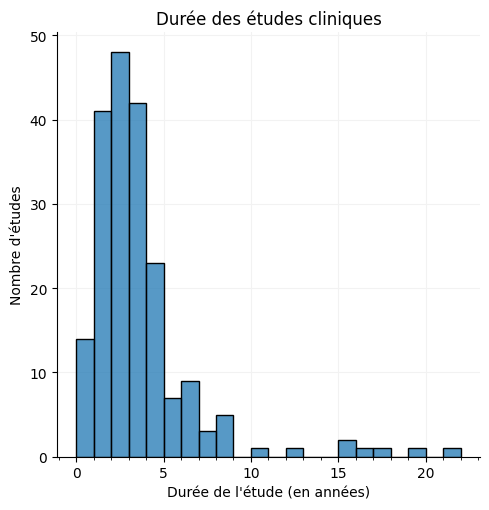

In [62]:
g = sns.displot(
    time_study_duration, 
    x = time_study_duration.loc[:, 'StudyDuration'].apply(lambda x: x.days/365.25),
    bins = range(0,23),
)

for ax in g.axes[0]:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))

# Title
g.set(
    title = "Durée des études cliniques",
    xlabel = "Durée de l'étude (en années)",
    ylabel = "Nombre d'études",
)

## Statistiques :

#### Nombre d'études cliniques:

In [63]:
num_trials = len(df_corrected.loc[:, 'NCTId'].unique())
num_trials

200

#### Nombre de publications :

In [64]:
num_publications = df_corrected.loc[:, 'pmid'].notna().sum()
num_publications

393

#### Nombre de publications par types :

In [65]:
df_corrected.loc[:, 'type'].value_counts()

type
DERIVED       142
BACKGROUND    110
RESULT         89
PUBMED         30
SUSPICIOUS     22
Name: count, dtype: int64

#### Nombre d'études sans publications :

In [66]:
num_trials_wo_pub = len(df_corrected.loc[df_corrected.loc[:, 'pmid'].isna(), 'NCTId'])
print("Nombre d'études sans publications:")
print(f"{num_trials_wo_pub} / {num_trials} ({num_trials_wo_pub / num_trials:.2%})")

Nombre d'études sans publications:
105 / 200 (52.50%)


#### Nombre d'études avec au moins une publication :

In [67]:
num_trials_with_pub = len(df_corrected.loc[df_corrected.loc[:, 'pmid'].notna(), 'NCTId'].unique())
print("Nombre d'études avec au moins une publication :")
print(f"{num_trials_with_pub} / {num_trials} ({num_trials_with_pub / num_trials:.2%})")

Nombre d'études avec au moins une publication :
95 / 200 (47.50%)


In [68]:
assert num_trials == (num_trials_wo_pub + num_trials_with_pub)

#### Nombre d'études avec au moins une publication de type 'RESULT' :

In [69]:
num_trials_with_res = len(
    df_corrected.loc[(df_corrected.loc[:, 'type'] == 'RESULT'), 'NCTId'].unique()
)

In [70]:
print("Nombre d'études avec au moins une publication de type 'RESULT' :")
print(f"{num_trials_with_res} / {num_trials} ({num_trials_with_res / num_trials:.2%})")

Nombre d'études avec au moins une publication de type 'RESULT' :
9 / 200 (4.50%)


**Un nombre très faible d'études déclarent des résultats de type 'RESULT'.**  
Parmis ces études, un nombre encore plus faible concentrent la majorité des publications déclarées comme 'RESULT'.

In [71]:
df_corrected.loc[(df_extract.loc[:, 'type'] == 'RESULT'), 'NCTId'].value_counts()

NCTId
NCT03324633    34
NCT01546181    19
NCT03235258    12
NCT00136630    11
NCT04470648     8
NCT04315948     7
NCT01432821     5
NCT02573948     4
NCT01490489     3
NCT02488395     3
NCT02916732     2
NCT01882062     1
NCT02329054     1
Name: count, dtype: Int64

#### Nombre d'études avec au moins une publication autre que 'BACKGROUND' :

In [72]:
# Unique NCTIDs with with publication type other than <NA>
nctids = df_corrected.loc[:, ['NCTId', 'type']].dropna().loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = (df_corrected.loc[:, 'NCTId'] == nctid)
    if ~((df_corrected.loc[mask, 'type'] == 'BACKGROUND').all()):
        res.append(nctid)
        
print("Nombre d'études avec au moins une publication autre que 'BACKGROUND' :")
print(f"{len(res)} / {num_trials} ({len(res) / num_trials:.2%})")

Nombre d'études avec au moins une publication autre que 'BACKGROUND' :
90 / 200 (45.00%)


Etudes dont toutes les publications sont de type 'BACKGROUND':

In [73]:
# Unique NCTIDs with with publication type other than <NA>
nctids = df_corrected.loc[:, ['NCTId', 'type']].dropna().loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = (df_corrected.loc[:, 'NCTId'] == nctid)
    if (df_corrected.loc[mask, 'type'] == 'BACKGROUND').all():
        res.append(nctid)
res

['NCT02496312', 'NCT04780191', 'NCT02738502', 'NCT03519503', 'NCT02656407']

## Export pour un traitement manuel

On a constaté qu'on ne peut pas se fier aux données récupérées automatiquement, notamment le type de publications.  
Il va falloir faire une vérification manuelle.

#### Export en CSV:

In [74]:
columns_to_export = ['NCTId', 'BriefTitle', 'HasResults', 'type', 'doi', 'pmid', 'published_date']
df_corrected.loc[:, columns_to_export]

,NCTId,BriefTitle,HasResults,type,doi,pmid,published_date
0,NCT02777229,Efficacy and Safety of a Dolutegravir-based Re...,False,PUBMED,10.1097/QAI.0000000000003273,37851566,2023-11-01
1,NCT02777229,Efficacy and Safety of a Dolutegravir-based Re...,False,DERIVED,10.1007/s40273-020-00987-3,33355914,2020-12-23
2,NCT02777229,Efficacy and Safety of a Dolutegravir-based Re...,False,DERIVED,10.1016/S2352-3018(20)30238-1,33010241,2020-10-01
3,NCT02777229,Efficacy and Safety of a Dolutegravir-based Re...,False,PUBMED,10.1093/ofid/ofad582,38156046,2023-11-20
4,NCT02777229,Efficacy and Safety of a Dolutegravir-based Re...,False,DERIVED,10.1056/NEJMoa1904340,31339676,2019-08-29
...,...,...,...,...,...,...,...
493,NCT02172677,The Influence of Collective Schemas on Individ...,False,NaN,<NA>,<NA>,NaT
494,NCT01037777,RISCA : Prospective Study of Individuals at Ri...,False,DERIVED,10.1136/jmedgenet-2013-102200,24780882,2014-04-29
495,NCT01037777,RISCA : Prospective Study of Individuals at Ri...,False,DERIVED,10.1016/S1474-4422(13)70104-2,23707147,2013-07-01
496,NCT01037777,RISCA : Prospective Study of Individuals at Ri...,False,DERIVED,10.1212/WNL.0000000000200257,35264424,2022-05-17


In [75]:
df_corrected.loc[:, columns_to_export].to_csv(
    'Data/outputs/df_results.csv',
    columns = columns_to_export,
    sep=';',
    index=False,
    encoding='utf-8-sig',
)

In [76]:
# TODO: export to Excel with appropriate treatment:
# - alternate row shading based on NCTId
# - pmid_link to Pubmed
# - color green 'HasResult'
# - color red 'SUSPICIOUS' type
# - bold type 'RESULT' type
# - header
# - hide doi ?